In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTEENN
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")



pd.options.display.max_columns = 60
pd.options.display.max_rows = 60

## DATA PRE PROCESSING

### LOAD DATA & HANDLING DATA

In [2]:
df = pd.read_csv('churn.csv')

In [3]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Missing Values handling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB


In [5]:
df.nunique()

customerID          7023
Gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
Tenure                72
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1583
TotalCharges        6530
Churn                  2
dtype: int64

In [6]:
#Unique data yang tidak memiliki pengaruh terhadap data.
df.drop(columns= 'customerID', axis=1, inplace=True)

In [7]:
# Mengetahui persentase missing values dari setiap kolom
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Gender              0.227079
SeniorCitizen       0.170309
Partner             0.227079
Dependents          0.269657
Tenure              0.241272
Contract            0.184502
PaperlessBilling    0.184502
PaymentMethod       0.156117
MonthlyCharges      0.141924
TotalCharges        0.000000
Churn               0.000000
dtype: float64

In [8]:
df['SeniorCitizen'].fillna(df['SeniorCitizen'].mean(), inplace = True)
df['Tenure'].fillna(df['Tenure'].mean(), inplace = True)
df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean(), inplace = True)

In [9]:
# mengubah data tipe dari seniorcistizen ke integer
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)

In [10]:
df['Churn'].replace({'Yes':1,'No':0},inplace=True)
df['Gender'].replace({'Male':1,'Female':0},inplace=True)
df['Partner'].replace({'Yes':1,'No':0},inplace=True)
df['Dependents'].replace({'Yes':1,'No':0},inplace=True)
df['PaperlessBilling'].replace({'Yes':1,'No':0},inplace=True)

In [11]:
df

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,NaN,0.0,1.0,Month-to-month,1.0,Electronic check,29.85,29.85,0
1,1.0,0,0.0,0.0,34.0,One year,0.0,Mailed check,56.95,1889.50,0
2,1.0,0,0.0,0.0,2.0,Month-to-month,1.0,Mailed check,53.85,108.15,1
3,1.0,0,0.0,0.0,45.0,One year,0.0,Bank transfer (automatic),42.30,1840.75,0
4,0.0,0,0.0,0.0,2.0,Month-to-month,1.0,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...
7041,NaN,0,1.0,1.0,67.0,Two year,1.0,Bank transfer (automatic),54.20,3838.20,0
7042,0.0,0,0.0,0.0,2.0,Month-to-month,1.0,Electronic check,70.75,146.90,1
7043,0.0,0,0.0,0.0,42.0,Two year,1.0,Credit card (automatic),78.45,3373.40,0
7044,0.0,1,1.0,0.0,38.0,Month-to-month,1.0,Electronic check,83.45,3147.15,0


In [12]:
df['Gender'].fillna(df['Gender'].mean(), inplace = True)
df['Partner'].fillna(df['Partner'].mean(), inplace = True)
df['Dependents'].fillna(df['Dependents'].mean(), inplace = True)
df['PaperlessBilling'].fillna(df['PaperlessBilling'].mean(), inplace = True)

In [13]:
df['Gender'] = df['Gender'].astype(int)
df['Partner'] = df['Partner'].astype(int)
df['Dependents'] = df['Dependents'].astype(int)
df['PaperlessBilling'] = df['PaperlessBilling'].astype(int)

In [14]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34.0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2.0,Month-to-month,1,Electronic check,70.70,151.65,1


In [15]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
Tenure              0.000000
Contract            0.184502
PaperlessBilling    0.000000
PaymentMethod       0.156117
MonthlyCharges      0.000000
TotalCharges        0.000000
Churn               0.000000
dtype: float64

In [16]:
df.dropna(how = 'any', inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7022 entries, 0 to 7045
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7022 non-null   int32  
 1   SeniorCitizen     7022 non-null   int32  
 2   Partner           7022 non-null   int32  
 3   Dependents        7022 non-null   int32  
 4   Tenure            7022 non-null   float64
 5   Contract          7022 non-null   object 
 6   PaperlessBilling  7022 non-null   int32  
 7   PaymentMethod     7022 non-null   object 
 8   MonthlyCharges    7022 non-null   float64
 9   TotalCharges      7022 non-null   float64
 10  Churn             7022 non-null   int64  
dtypes: float64(3), int32(5), int64(1), object(2)
memory usage: 521.2+ KB


In [18]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
Tenure              0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

## Duplicates Handling

In [19]:
df.duplicated().sum()

37

In [20]:
df[df.duplicated()]

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
961,1,0,0,0,1.0,Month-to-month,1,Mailed check,45.70,45.70,1
1334,1,0,0,0,1.0,Month-to-month,0,Mailed check,20.15,20.15,1
1486,0,0,0,0,1.0,Month-to-month,0,Mailed check,19.55,19.55,0
1734,1,0,0,0,1.0,Month-to-month,1,Electronic check,69.90,69.90,1
1927,1,0,0,0,1.0,Month-to-month,0,Mailed check,20.20,20.20,0
2708,1,0,0,0,1.0,Month-to-month,1,Mailed check,20.45,20.45,0
2887,1,0,0,0,1.0,Month-to-month,0,Mailed check,20.45,20.45,0
3296,0,1,0,0,1.0,Month-to-month,1,Electronic check,69.60,69.60,1
3748,1,0,0,0,1.0,Month-to-month,0,Mailed check,20.05,20.05,0
4091,1,0,0,0,1.0,Month-to-month,1,Mailed check,20.20,20.20,1


In [21]:
df2 = df.drop_duplicates()

In [22]:
df2.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34.0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2.0,Month-to-month,1,Electronic check,70.70,151.65,1


## Split the data

In [23]:
df3 = pd.get_dummies(df2)
df3.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,1.0,1,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34.0,0,56.95,1889.50,0,0,1,0,0,0,0,1
2,1,0,0,0,2.0,1,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45.0,0,42.30,1840.75,0,0,1,0,1,0,0,0
4,0,0,0,0,2.0,1,70.70,151.65,1,1,0,0,0,0,1,0


In [24]:
churn_counts = df3['Churn'].value_counts()
churn_counts

0    5137
1    1848
Name: Churn, dtype: int64

Since our minority class (churn 1) is 2.76 times smaller than majority class (churn 0) we should consider oversampling the minority class. This problem is called imbalance dataset. This could be done using SMOTE-ENN technique (Synthetic Minority Over-sampling Technique combined with Edited Nearest Neighbors).

This hybrid sampling technique combines both over-sampling and under-sampling techniques to address the class imbalance problem in binary classification tasks. The SMOTE-ENN technique generates synthetic examples for the minority class and remove noisy examples from the majority class. The SMOTE technique is applied first to over-sample the minority class and generate synthetic examples. Then, the ENN technique is applied to remove noisy examples from the majority class. This results in a balanced dataset with reduced noise and increased number of minority class examples.
(ref : https://www.kaggle.com/code/igorkocic/telco-customer-churn-eda-machine-learning)

In [25]:
X = df3.copy()

In [26]:
X = df3.drop('Churn', axis = 1)

In [27]:
y = df3['Churn']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [29]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [30]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

## MULTICOLINEARITY STUDY

In [31]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(xr_test)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Gender,1.067123
2,SeniorCitizen,1.100115
3,Partner,1.730939
4,Dependents,1.545436
5,Tenure,8.337127
6,PaperlessBilling,1.142225
7,MonthlyCharges,3.572668
8,TotalCharges,8.474657
9,Contract_Month-to-month,8.293516
10,Contract_One year,4.932537


Observation :
* there are high vif score so it can be highly correlated and becoming multicolinearity.
 - Tenure
 - TotalCharges
 - Contract_Month-to-month	
 - Contract_One year	
 - Contract_Two year	

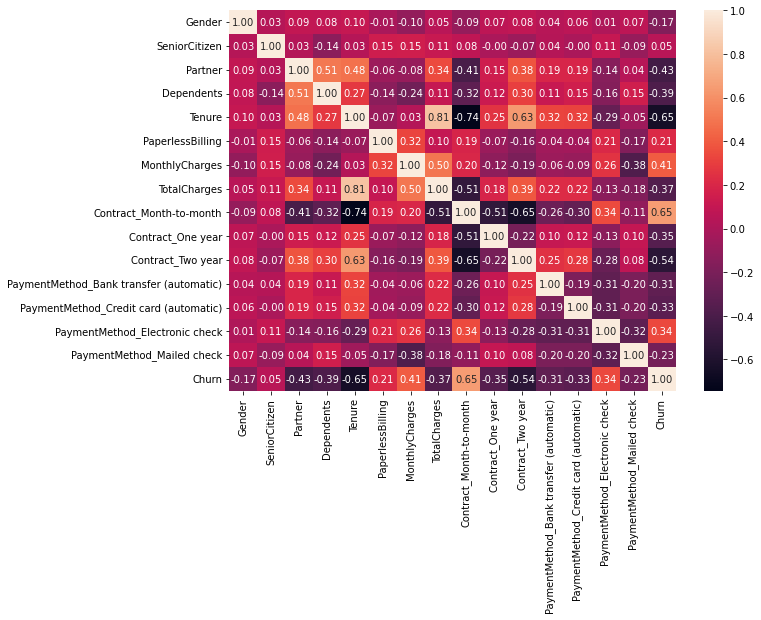

In [32]:
# heatmap correlation
churn_train = pd.concat([xr_train, yr_train], axis=1)
corr = churn_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

From the heatmap correlation we can see that tenure has 0.81 so and contract month to month need to drop as well because although we keep it it will give us high vif score that there is medium severe multicolinearity.

In [33]:
# drop redundant features
xr_train = xr_train.drop(columns=['Tenure','Contract_Month-to-month'])
xr_test = xr_test.drop(columns=['Tenure','Contract_Month-to-month'])

In [34]:
# recheck calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(xr_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Gender,1.048555
2,SeniorCitizen,1.080473
3,Partner,1.617729
4,Dependents,1.484166
5,PaperlessBilling,1.164106
6,MonthlyCharges,2.749973
7,TotalCharges,3.024966
8,Contract_One year,1.612120
9,Contract_Two year,2.404675
10,PaymentMethod_Bank transfer (automatic),2.143634


from the data above, we can take the conclusion that the data is imbalance set so we need to check the `recall` score rather than using `Accuracy` score

## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

In [38]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(xr_train, yr_train)

CPU times: total: 5.08 s
Wall time: 5.14 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [39]:
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
1,"{'max_depth': 1, 'n_estimators': 20}",0.992126,1
0,"{'max_depth': 1, 'n_estimators': 10}",0.988394,2
2,"{'max_depth': 1, 'n_estimators': 30}",0.979696,3
5,"{'max_depth': 2, 'n_estimators': 10}",0.979277,4
4,"{'max_depth': 1, 'n_estimators': 50}",0.973481,5
6,"{'max_depth': 2, 'n_estimators': 20}",0.966853,6
3,"{'max_depth': 1, 'n_estimators': 40}",0.966430,7
16,"{'max_depth': 4, 'n_estimators': 20}",0.966015,8
9,"{'max_depth': 2, 'n_estimators': 50}",0.962711,9
17,"{'max_depth': 4, 'n_estimators': 30}",0.962287,10


In [42]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(xr_test)
print(classification_report(yr_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.64      0.77       518
           1       0.76      0.99      0.86       616

    accuracy                           0.83      1134
   macro avg       0.87      0.81      0.82      1134
weighted avg       0.87      0.83      0.82      1134



## K-NN Classification

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [44]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(xr_train, yr_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

In [45]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.969740,2
1,{'n_neighbors': 3},0.974715,1
2,{'n_neighbors': 4},0.950257,5
3,{'n_neighbors': 5},0.961035,3
4,{'n_neighbors': 6},0.946118,6
5,{'n_neighbors': 7},0.953992,4
6,{'n_neighbors': 8},0.936173,7


In [47]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(xr_test)
print(classification_report(yr_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       518
           1       0.98      0.99      0.98       616

    accuracy                           0.98      1134
   macro avg       0.98      0.98      0.98      1134
weighted avg       0.98      0.98      0.98      1134



Conclusion :
though KNN Clasification has the same score on recall score for churn event (=1) but it has better than Randomforest because it has higher recall score for non churn (remained customer).